TSF: 1 In this project i have used Air Passenger dataset. This projct contains only the analysis of Time Series data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("AirPassenger.csv", parse_dates=True, squeeze = True, index_col = 0)

In [9]:
df.head()

Year-Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Pax, dtype: int64

In [10]:
df.tail()

Year-Month
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Pax, dtype: int64

In [11]:
df.size

144

In [12]:
df.isnull().sum()

0

In [43]:
df.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Pax, dtype: float64

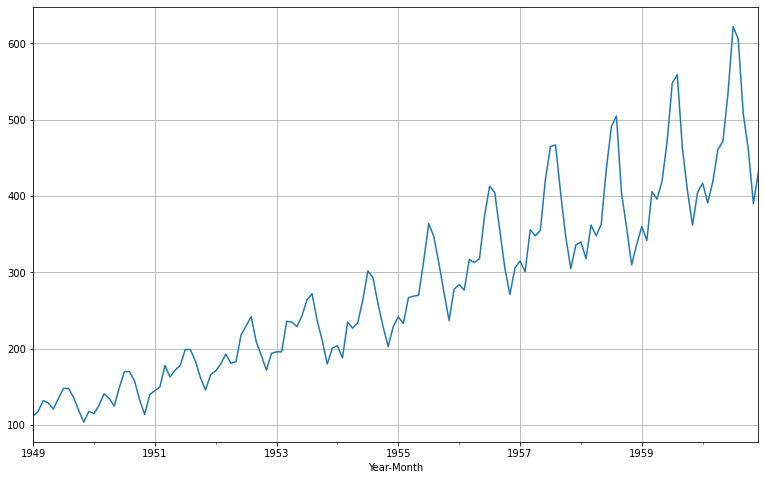

In [38]:
df.plot(figsize =(13,8));
plt.grid();


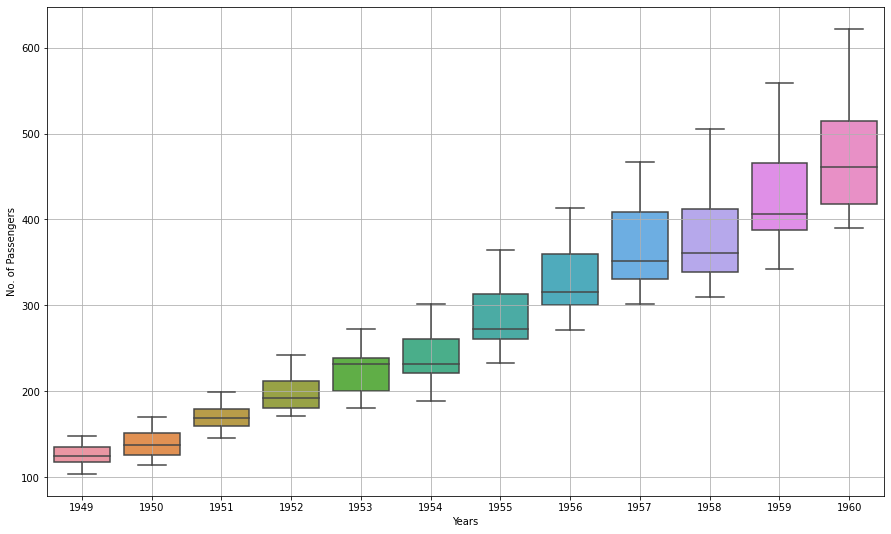

In [39]:
fig, ax = plt.subplots(figsize=(15,9));
sns.boxplot(x = df.index.year, y = df, ax=ax);
plt.grid();
plt.xlabel('Years');
plt.ylabel('No. of Passengers');
plt.show;

In [47]:
df.mean()

280.2986111111111

In [49]:
df['1956']

Year-Month
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
Name: Pax, dtype: int64

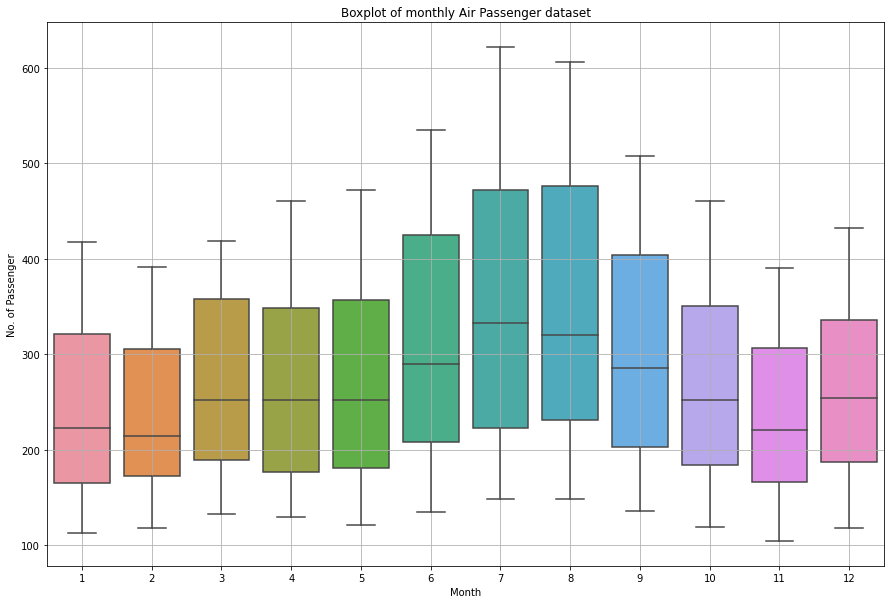

In [56]:
fig, ax = plt.subplots(figsize=(15,10));
sns.boxplot(x= df.index.month, y = df,ax=ax);
plt.grid()
plt.xlabel('Month');
plt.ylabel('No. of Passenger');
plt.title('Boxplot of monthly Air Passenger dataset');
plt.show();

# Decompose the Time series

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
from pylab import rcParams  #To increase the size of the plot in TS Data.
rcParams['figure.figsize']= 13,8

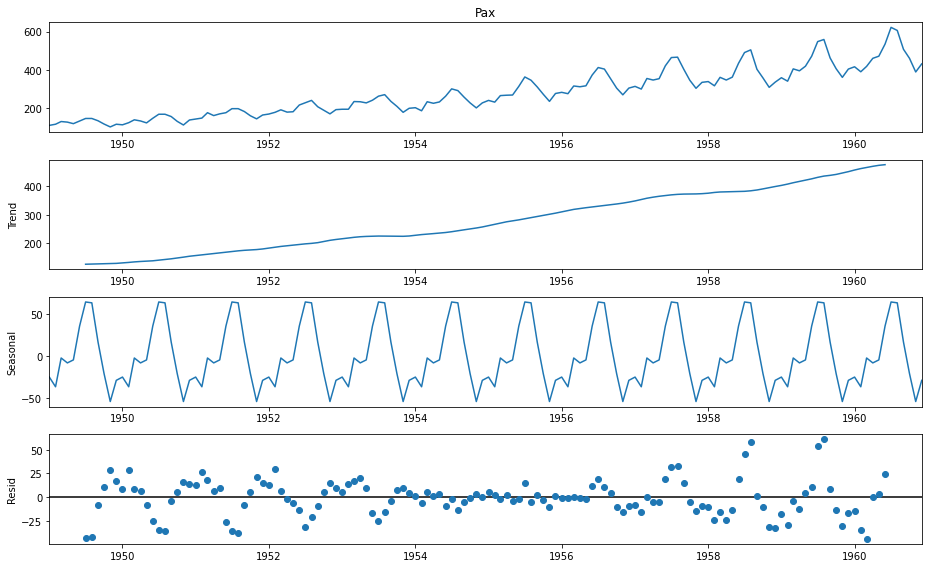

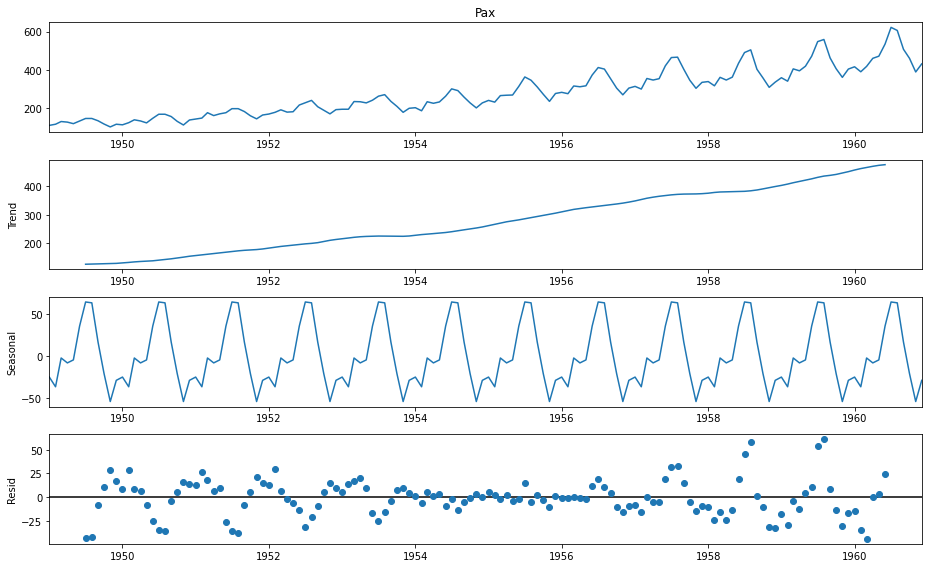

In [76]:
decomposition=seasonal_decompose(df, model = 'Additive')
decomposition.plot()

In [81]:
trend=decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [83]:
print('Trend', '\n', trend.head(12), '\n')
print('Seasonality', '\n', seasonality.head(12), '\n')
print('Residual', '\n', residual.head(12), '\n')

Trend 
 Year-Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
Name: trend, dtype: float64 

Seasonality 
 Year-Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
1949-06-01    35.402778
1949-07-01    63.830808
1949-08-01    62.823232
1949-09-01    16.520202
1949-10-01   -20.642677
1949-11-01   -53.593434
1949-12-01   -28.619949
Name: seasonal, dtype: float64 

Residual 
 Year-Month
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
1949-12-01    16.86

In [84]:
deseasonalized_ts = trend + residual
deseasonalized_ts.head(12)

Year-Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01     84.169192
1949-08-01     85.176768
1949-09-01    119.479798
1949-10-01    139.642677
1949-11-01    157.593434
1949-12-01    146.619949
dtype: float64

**End**